# Data science is OSEMN

According to a popular model, the elements of data science are

* Obtaining data
* Scrubbing data
* Exploring data
* Modeling data
* iNterpreting data

and hence the acronym OSEMN, pronounced as “Awesome”.

We will start with the **O**, moving towards the rest later, but first let's have a quick look at what it all boils down to

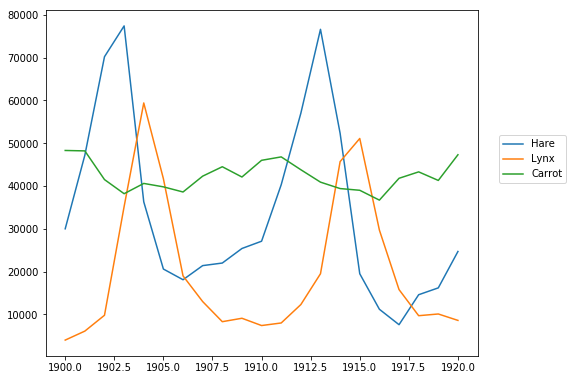

In [1]:
import numpy as np
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T # trick: columns to variables


from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

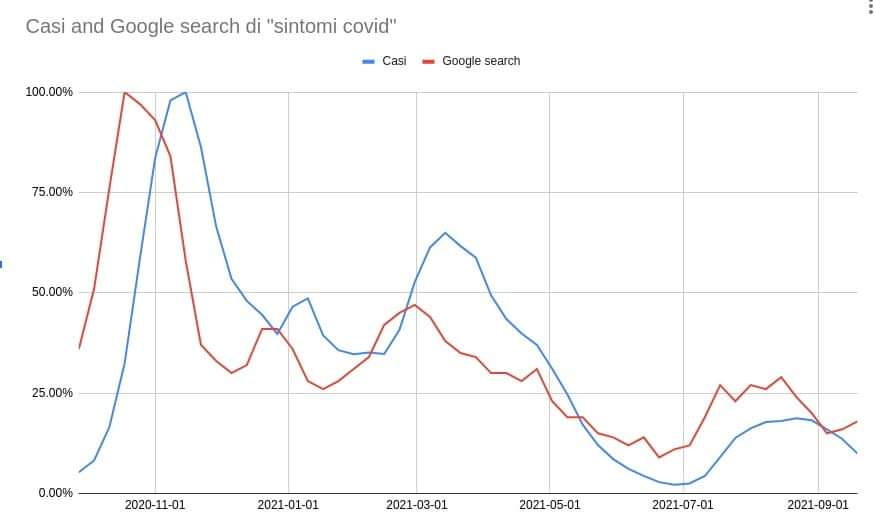

In [2]:
from IPython.display import Image
Image("cases_vs_searches.jpeg")

By plotting the data a clear (and reasonable) correlations between pray and predator becomes evident. How can it be quantified? Is that statistical significant? What about the correlation between carrots and hares? Is that evident? Is that significant?

Finding correlations in data is the main goal of data science, though that is not the end of the story: as this precious [site](http://tylervigen.com/spurious-correlations) demonstrates, **correlations is not causation**. 

(I've been invited to a school of Philosophy of Science to talk about the role of ML in Physics and they even asked me to write a summary of that. You find it [here](https://www.dropbox.com/s/lcjpgsrsoi0iyq3/Fisica_ML.docx), in Italian.. (humanists like that better than English))


*Exercise*: write an algorithm that determins and quantifies a correlation between two time series. Use as an example the hare-lynx-carrot dataset.

**N.B:** 
If in the cells below you import a packpage not yet installed, you can either install it the usual way, or run a cell like the following:

In [ ]:
# uncomment and set  NAME_OF_THE_PACKAGE to what you need
'''
import subprocess
subprocess.call(['pip', 'install', 'NAME_OF_THE_PACKAGE'])
'''

# Obtaining and processing (remote) data

Accessing data is a really serious business. Data can sit on public or on remote machines. In the case of the former, things may be straightforward, whereas in the latter case you need to worry about a few things.

In both cases, depending on the size of the dataset, the managment of the dataset can become extremely complicated. We won't deal here with large datasets, which require a whole course per se.., but still care should be put. In particular, it is not wise to keep (and even worse commit) data into a git repository!

The suggestion is then to create a directory somewhere and copy the example datasets there. From a terminal:

```bash

# create a data directory in your home directory
mkdir ~/data/

# check the content (it's empty now of course)
ls -ltr ~/data/

# in the case you need to move there:
cd ~/data/
```

### Download data from a server

A nice set of interesting datasets can be found on this [server](https://archive.ics.uci.edu/ml/datasets.php) that collects training/test data for machine learning developments. Several of those pertein physical sciences, it is worth browsing through those.

You can download any of those, in the following we will consider a dataset from the MAGIC experiment. For that we will the `wget` command

In [3]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/    

--2024-11-20 11:00:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/pieripol/data/magic04.data’

magic04.data            [             <=>    ]   1.41M   397KB/s    in 3.9s    

2024-11-20 11:00:15 (368 KB/s) - ‘/home/pieripol/data/magic04.data’ saved [1477391]

--2024-11-20 11:00:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/pieripol/data/magic04.names’

magic04.names           [ <=>                ]   5.27K  --.-KB/s    in 0s      


In [4]:
# print the description. This can (and better) be done from a terminal
!cat ~/data/magic04.names

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

In [5]:
!cat ~/data/magic04.data

28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
162.052,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.449,116.737,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.648,356.462,g
51.624,21.1502,2.9085,0.242,0.134,50.8761,43.1887,9.8145,3.613,238.098,g
48.2468,17.3565,3.0332,0.2529,0.1515,8.573,38.0957,10.5868,4.792,219.087,g
26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.456,-2.9292,0.812,237.134,g
96.2327,46.5165,4.154,0.0779,0.039,110.355,85.0486,43.1844,4.854,248.226,g
46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.875,102.251,g
62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.771,9.9144,323.094,g
18.8562,16.46,2.4385,0.5282,0.2933,25.1269,-6.5401,-16.9327,11.461,162.848,g
45.6321,22.71,3.0441,0.2213,0.1215,-18.3986,-20.6427,-14.3164,0.3822,178.255,g
33.1

48.9731,19.9284,2.9467,0.2826,0.1543,34.7889,47.4344,12.7581,3.7944,261.857,g
46.6559,13.9374,2.7131,0.3466,0.1965,9.6048,34.2839,7.4314,2.771,195.068,g
39.1431,20.9245,2.8739,0.2567,0.1504,22.0114,36.095,-15.6353,14.8637,131.863,g
81.9688,24.7704,3.4994,0.1694,0.0869,70.3519,79.8711,-15.134,2.967,266.017,g
21.6024,15.3985,2.4639,0.5017,0.2904,22.9079,15.7249,8.077,8.9044,191.291,g
82.0529,26.5682,3.2166,0.2636,0.1327,-26.6717,72.0568,-21.1118,2.031,303.228,g
43.1587,16.4368,2.8038,0.2545,0.128,13.7851,34.7238,-8.2073,11.521,190.141,g
90.9354,28.4311,3.4619,0.1412,0.0747,96.8513,87.6392,-19.6358,6.1616,284.011,g
20.9442,6.9091,2.1123,0.749,0.4286,21.6052,13.8989,-6.0589,12.268,130.034,g
35.9742,13.9513,2.6642,0.4897,0.2676,30.6364,33.5526,-9.433,9.2464,109.853,g
124.496,30.9829,3.0035,0.1954,0.0997,81.8411,98.4828,-22.6109,88.582,97.1847,g
49.3308,19.4102,3.0382,0.2509,0.1314,8.6066,31.7972,-18.1024,1.5672,195.495,g
60.0412,20.1433,2.8971,0.2839,0.1717,68.5118,-44.8613,-13.5951,0.955,1

35.4335,17.1768,2.7566,0.3713,0.218,6.1006,29.8459,12.9883,25.724,157.738,g
71.0768,22.736,3.2111,0.1888,0.0987,-81.5167,56.5905,-12.9656,5.2124,279.661,g
36.1276,10.3417,2.4338,0.4972,0.256,-33.3708,28.0494,-6.7114,0.5848,74.7372,g
84.6951,17.7647,3.0067,0.2285,0.1236,89.545,74.9496,-14.8782,2.2374,256.469,g
21.2181,6.6886,2.2343,0.7522,0.4636,20.5985,15.3193,-6.2442,12.001,128.952,g
37.4814,17.5395,2.8899,0.241,0.1231,32.9753,20.1676,3.9457,3.5686,162.66,g
53.8028,32.9317,3.6384,0.1885,0.1024,-40.1283,38.5475,18.7867,5.2892,298.301,g
26.1952,9.555,2.3589,0.4945,0.256,-10.014,12.4124,6.4945,2.396,228.289,g
25.9034,12.1401,2.4564,0.4126,0.2325,34.8238,12.3815,-5.1151,34.0048,89.8237,g
79.4075,23.3542,3.0109,0.2087,0.1048,74.2944,68.1864,-13.2984,8.772,257.887,g
52.1403,20.254,3.2234,0.1734,0.1019,7.3112,20.9483,5.5489,0.1304,163.027,g
21.0441,12.1584,2.2589,0.5014,0.2562,1.6034,-7.9755,-10.7302,15.833,170.767,g
70.93,35.7181,3.8856,0.1253,0.0662,20.1338,60.9939,22.3921,2.062,236.218,g


36.3425,9.2414,2.7926,0.3956,0.2214,25.3189,23.2299,9.2156,32.5796,186.0689,h
74.837,64.3245,3.4831,0.3005,0.1757,6.0804,-57.0294,62.7771,9.532,339.734,h
15.0563,12.5002,2.1824,0.8173,0.414,-17.5473,-6.0448,-10.0996,42.7782,192.2809,h
123.2858,29.478,3.2032,0.1452,0.093,27.1059,19.857,-36.8857,32.2261,94.2075,h
18.0766,4.9075,2.3023,0.7805,0.4709,-7.9265,7.482,1.4929,22.1043,57.8698,h
52.5772,25.1815,2.7124,0.542,0.3845,-40.8749,-18.801,-20.6084,10.2974,299.2486,h
123.7507,88.0211,3.4831,0.2012,0.0985,48.1103,79.9657,-103.8981,44.4057,301.3919,h
25.5669,14.281,2.5447,0.388,0.2097,-18.561,-9.2701,1.9799,85.3588,222.365,h
19.0902,8.9402,2.3579,0.6886,0.4715,-4.5386,13.6819,-10.3342,31.8911,153.163,h
141.569,29.0156,2.9039,0.3943,0.2027,-165.174,58.1828,-22.0201,51.4316,246.989,h
87.3343,58.5352,3.8619,0.1653,0.1011,-96.7451,-57.552,-31.9197,1.1715,387.7073,h
131.913,40.049,3.3995,0.1606,0.0867,-131.708,-62.3433,36.9203,31.124,276.301,h
144.2787,21.6688,2.8651,0.2941,0.1506,-0.9184,-60.41

It is possible to download and load remote files via their url's directly from within python (and thus on a jupyter session). This is a rather powerful tool as it allows http communications, IO streaming and so on.

Care should be put as the dataset is stored in memory.

In [6]:
import urllib.request
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names'
with urllib.request.urlopen(url) as data_file:
    #print (data_file.read(300))
    for line in data_file:
        print (line)

b'1. Title of Database: MAGIC gamma telescope data 2004\n'
b'\n'
b'2. Sources:\n'
b'\n'
b'   (a) Original owner of the database:\n'
b'\n'
b'       R. K. Bock\n'
b'       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)\n'
b'       http://wwwmagic.mppmu.mpg.de\n'
b'       rkb@mail.cern.ch\n'
b'\n'
b'   (b) Donor:\n'
b'\n'
b'       P. Savicky\n'
b'       Institute of Computer Science, AS of CR\n'
b'       Czech Republic\n'
b'       savicky@cs.cas.cz\n'
b'\n'
b'   (c) Date received: May 2007\n'
b'\n'
b'3. Past Usage:\n'
b'\n'
b'   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,\n'
b'       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,\n'
b'       Vaicilius, A., Wittek W. (2004).\n'
b'       Methods for multidimensional event classification: a case study\n'
b'       using images from a Cherenkov gamma-ray telescope.\n'
b'       Nucl.Instr.Meth. A, 516, pp. 511-528.\n'
b'\n'
b'   (b) P. Savicky, E. Kotrc.\n'
b'       Experimental Stu

###  Copy data from a remote machine

Often datasets are not available on websites but rather they are sitting on some remote machine. Several tools are there that can allow you to get hold off remote data, even from within python (e.g. [paramiko](https://www.paramiko.org/)), but best in this case is to get a local copy. E.g. from a terminal:

```bash
scp guest104@gatep.fisica.unipd.it:~/data/data_000637.* ~/data/
```

by issuing that command you are immediately exposed to the most relevant problem in obtaining the data: permissions/authorization.

Indeed that will not work (as you don't have an account on that machine and I'd be put into jail if I gave you the password), still you'll need that file later, so "wget" it:


In [7]:
!wget https://www.dropbox.com/s/69xe1d5f19nvtw3/data_000637.dat -P ~/data/

# copy the interpreted version as well
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2024-11-20 11:08:24--  https://www.dropbox.com/s/69xe1d5f19nvtw3/data_000637.dat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/7qn9z11sadf7o56r71kjl/data_000637.dat?rlkey=inru1oi9hl4gtk33eitddnvin [following]
--2024-11-20 11:08:24--  https://www.dropbox.com/scl/fi/7qn9z11sadf7o56r71kjl/data_000637.dat?rlkey=inru1oi9hl4gtk33eitddnvin
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf28226371d58a923d672883c5c.dl.dropboxusercontent.com/cd/0/inline/CetcXWjs42yHm6cyEmuOTR-A6j5r5Z2K-zEqbjvoyXAigA2H4dySuy-Zs3fGbAkgxL3UsldLYlDRYapiBx9zXTCwXeXrIJr_NNtlC6mfGELr_VFmJZWvxbWWY7Jv7V-l5Nk/file# [following]
--2024-11-20 11:08:24--  https://ucf28226371d58a923d672883c5c.dl.dropboxusercontent.com/cd/0/inline/CetcXWjs42

Secondily (essentially a further consequence of the same issue), the remote machine itself may have accessibility restrictions, e.g. being behind a firewall. In that case you may need to use a tunnel:

``` bash
ssh -L 1234:<address of R known to G>:22 <user at G>@<address of G> 

scp -P 1234 <user at R>@127.0.0.1:/path/to/file file-name-to-be-copied
```

In summary, just getting the data is a complicated business.

## Data Formats

datasets can be stored in a gazillion different ways, often they have formats which are application dependent, even though more and more standards are being established. Python have "readers" for most of the formats, another reason for being the optimal programming language for data analysis.

### Text files 

Plain text files are commonly used for "readibility", at the price of a very poor storing efficiency due to their low entropy. [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is the most common encoding.

Reading (and writing) text files in python is straightforward:

In [12]:
file_name = "/home/pieripol/data/magic04.data"

# mode can be specified for writing, reading or both
with open(file_name, mode='r') as f:
    # print-out the whole file
    # print (f.read()) 
    for line in f:
        ## print line by line
        print (line)
        ## each line is a string, you need to split it yourself
        for c in line.split(): print(c) # check the functionalities of the split() method 

28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g

28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g

31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
162.052,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,g

162.052,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.449,116.737,g

23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.449,116.737,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.648,356.462,g

75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.648,356.462,g
51.624,21.1502,2.9085,0.242,0.134,50.8761,43.1887,9.8145,3.613,238.098,g

51.624,21.1502,2.9085,0.242,0.134,50.8761,43.1887,9.8145,3.613,238.098,g
48.2468,17.3565,3.0332,0.2529,0.1515,8.573,38.0957,10.5868,4.792,219.087,g



26.4957,19.7704,2.8096,0.3364,0.1915,29.2515,21.2692,8.8332,57.543,125.776,g
21.5956,16.7994,2.6527,0.436,0.2659,7.437,12.0294,-12.6692,52.6428,40.1499,g

21.5956,16.7994,2.6527,0.436,0.2659,7.437,12.0294,-12.6692,52.6428,40.1499,g
19.2814,14.4914,2.3064,0.5235,0.3136,-6.0002,16.7003,0.1864,33.6702,46.8615,g

19.2814,14.4914,2.3064,0.5235,0.3136,-6.0002,16.7003,0.1864,33.6702,46.8615,g
92.0007,34.869,3.6213,0.2255,0.1216,12.635,48.376,22.2188,1.7669,372.871,g

92.0007,34.869,3.6213,0.2255,0.1216,12.635,48.376,22.2188,1.7669,372.871,g
28.4792,24.3384,2.4031,0.6522,0.3379,-30.006,-21.9428,18.6641,11.0181,314.871,g

28.4792,24.3384,2.4031,0.6522,0.3379,-30.006,-21.9428,18.6641,11.0181,314.871,g
30.2969,23.0277,2.8325,0.2338,0.1184,28.8164,20.7132,14.735,37.42,194.753,g

30.2969,23.0277,2.8325,0.2338,0.1184,28.8164,20.7132,14.735,37.42,194.753,g
21.4533,10.874,2.2553,0.55,0.275,6.2375,-18.1623,8.6273,26.256,190.149,g

21.4533,10.874,2.2553,0.55,0.275,6.2375,-18.1623,8.6273,26.256,190.149,g

46.9364,18.5233,3.0099,0.2405,0.1217,-2.7164,31.6987,11.2247,1.4485,127.868,g
21.3271,10.5084,2.1931,0.5769,0.2917,-6.9462,18.1267,-10.4721,37.201,231.596,g

21.3271,10.5084,2.1931,0.5769,0.2917,-6.9462,18.1267,-10.4721,37.201,231.596,g
15.0587,13.4775,2.3997,0.7211,0.5438,-0.7286,-11.211,-13.7009,25.9856,108.06,g

15.0587,13.4775,2.3997,0.7211,0.5438,-0.7286,-11.211,-13.7009,25.9856,108.06,g
21.1449,6.7911,2.2565,0.7479,0.446,21.1667,14.6204,6.1983,0.2884,73.0449,g

21.1449,6.7911,2.2565,0.7479,0.446,21.1667,14.6204,6.1983,0.2884,73.0449,g
21.1612,6.9873,2.0626,0.7186,0.3939,-23.2157,-12.0341,-6.2376,52.3913,45.2924,g

21.1612,6.9873,2.0626,0.7186,0.3939,-23.2157,-12.0341,-6.2376,52.3913,45.2924,g
28.7177,17.7968,2.5838,0.4329,0.2595,42.5954,-21.6171,-5.5786,8.54,179.446,g

28.7177,17.7968,2.5838,0.4329,0.2595,42.5954,-21.6171,-5.5786,8.54,179.446,g
29.1413,9.9948,2.4074,0.5793,0.3072,25.7134,22.8337,-5.4342,13.171,210.189,g

29.1413,9.9948,2.4074,0.5793,0.3072,25.7134,22.8337,-5.4342


22.4678,0,2.2418,0.7564,0.4327,-2.4071,11.428,0.0001,0,297.593,g
22.0729,12.8478,2.2999,0.4962,0.2632,3.2731,-13.7213,5.4581,38.1238,228.808,g

22.0729,12.8478,2.2999,0.4962,0.2632,3.2731,-13.7213,5.4581,38.1238,228.808,g
18.7617,7.4713,2.1383,0.7636,0.4764,-1.573,6.4219,-3.1559,56.5174,96.4994,g

18.7617,7.4713,2.1383,0.7636,0.4764,-1.573,6.4219,-3.1559,56.5174,96.4994,g
20.2919,16.2356,2.6004,0.4768,0.2999,8.9987,-6.3068,-10.4155,22.438,86.1205,g

20.2919,16.2356,2.6004,0.4768,0.2999,8.9987,-6.3068,-10.4155,22.438,86.1205,g
22.8676,14.53,2.5289,0.4734,0.3003,15.5281,18.3161,10.7833,26.988,155.216,g

22.8676,14.53,2.5289,0.4734,0.3003,15.5281,18.3161,10.7833,26.988,155.216,g
22.4992,10.4464,2.2625,0.5683,0.3415,22.2059,19.508,-11.0449,26.9489,225.367,g

22.4992,10.4464,2.2625,0.5683,0.3415,22.2059,19.508,-11.0449,26.9489,225.367,g
20.1959,12.7303,2.2889,0.4679,0.2442,1.4964,-9.9919,-9.3993,26.193,136.41,g

20.1959,12.7303,2.2889,0.4679,0.2442,1.4964,-9.9919,-9.3993,26.193,136.41,g
35

43.1642,19.6792,2.9015,0.2459,0.1286,43.6493,32.1716,-13.947,11.4188,176.62,g

43.1642,19.6792,2.9015,0.2459,0.1286,43.6493,32.1716,-13.947,11.4188,176.62,g
31.0864,18.5673,2.6767,0.4168,0.2768,17.5192,24.088,16.6905,32.0528,144.293,g

31.0864,18.5673,2.6767,0.4168,0.2768,17.5192,24.088,16.6905,32.0528,144.293,g
17.7895,10.5909,2.3483,0.6143,0.3341,21.5665,10.8736,5.0219,13.325,208.15,g

17.7895,10.5909,2.3483,0.6143,0.3341,21.5665,10.8736,5.0219,13.325,208.15,g
27.0561,13.4792,2.616,0.4794,0.2869,-7.6385,-20.0816,-9.8318,14.852,171.689,g

27.0561,13.4792,2.616,0.4794,0.2869,-7.6385,-20.0816,-9.8318,14.852,171.689,g
33.8773,14.58,2.6355,0.3912,0.2141,22.7858,24.106,13.1553,17.282,208.599,g

33.8773,14.58,2.6355,0.3912,0.2141,22.7858,24.106,13.1553,17.282,208.599,g
39.745,14.4763,2.7255,0.3443,0.2004,52.5721,20.3876,6.2605,23.2283,149.83,g

39.745,14.4763,2.7255,0.3443,0.2004,52.5721,20.3876,6.2605,23.2283,149.83,g
42.0233,28.6937,3.0404,0.1868,0.1061,32.6467,27.2874,20.156,16.0801,126.

38.3944,13.8512,2.8052,0.379,0.2529,-11.6699,11.945,9.9001,2.491,226.528,g
19.4408,15.0511,2.5539,0.4944,0.2835,-4.9169,13.179,-8.4303,2.2614,47.0363,g

19.4408,15.0511,2.5539,0.4944,0.2835,-4.9169,13.179,-8.4303,2.2614,47.0363,g
45.0952,35.6845,3.1245,0.1734,0.0935,35.3679,39.3855,-23.5405,21.611,144.323,g

45.0952,35.6845,3.1245,0.1734,0.0935,35.3679,39.3855,-23.5405,21.611,144.323,g
19.9761,7.328,2.1833,0.741,0.4033,2.3635,-9.3424,-5.238,19.965,165.975,g

19.9761,7.328,2.1833,0.741,0.4033,2.3635,-9.3424,-5.238,19.965,165.975,g
44.8328,11.8428,2.6274,0.3679,0.204,28.8598,37.0115,-8.9649,6.682,183.42,g

44.8328,11.8428,2.6274,0.3679,0.204,28.8598,37.0115,-8.9649,6.682,183.42,g
29.2635,19.5491,2.9114,0.3409,0.1772,16.2367,23.0514,-13.5395,18.469,74.9146,g

29.2635,19.5491,2.9114,0.3409,0.1772,16.2367,23.0514,-13.5395,18.469,74.9146,g
41.2448,16.383,2.8762,0.2593,0.1336,16.2841,-20.586,8.8397,5.554,203.243,g

41.2448,16.383,2.8762,0.2593,0.1336,16.2841,-20.586,8.8397,5.554,203.243,g
30.

26.2678,8.3206,2.3889,0.645,0.387,-2.6525,0.6246,11.377,51.5742,168.6993,h
25.0466,14.9198,2.4548,0.4632,0.2474,8.0163,11.0654,13.9739,62.8382,219.754,h

25.0466,14.9198,2.4548,0.4632,0.2474,8.0163,11.0654,13.9739,62.8382,219.754,h
30.1951,18.3348,2.4404,0.4886,0.2508,10.6059,38.5225,-10.0649,74.6715,95.681,h

30.1951,18.3348,2.4404,0.4886,0.2508,10.6059,38.5225,-10.0649,74.6715,95.681,h
34.5624,4.4228,2.6043,0.527,0.2859,-7.5864,15.0831,-12.8197,46.372,235.2632,h

34.5624,4.4228,2.6043,0.527,0.2859,-7.5864,15.0831,-12.8197,46.372,235.2632,h
14.8256,9.8085,2.4788,0.5682,0.291,-13.1573,-4.4593,7.7445,83.6406,148.3716,h

14.8256,9.8085,2.4788,0.5682,0.291,-13.1573,-4.4593,7.7445,83.6406,148.3716,h
21.3122,5.9538,2.2393,0.7896,0.5677,17.1712,18.7293,6.3354,47.817,195.136,h

21.3122,5.9538,2.2393,0.7896,0.5677,17.1712,18.7293,6.3354,47.817,195.136,h
124.742,48.1381,3.4739,0.2606,0.1372,-84.4417,-110.132,-36.8957,7.538,394.841,h

124.742,48.1381,3.4739,0.2606,0.1372,-84.4417,-110.132,-36.89


37.3553,7.9149,2.4223,0.5277,0.3138,23.018,22.8409,10.1021,71.2449,187.516,h
164.8907,48.9917,3.5088,0.1682,0.0684,-160.4082,-93.0315,-44.3776,70.847,259.4162,h

164.8907,48.9917,3.5088,0.1682,0.0684,-160.4082,-93.0315,-44.3776,70.847,259.4162,h
60.0815,23.0309,2.7255,0.2239,0.1214,18.4052,40.3108,-3.5778,82.9643,90.9217,h

60.0815,23.0309,2.7255,0.2239,0.1214,18.4052,40.3108,-3.5778,82.9643,90.9217,h
21.0523,14.8214,2.6279,0.6007,0.3946,18.1624,21.6201,-3.48,12.1039,155.782,h

21.0523,14.8214,2.6279,0.6007,0.3946,18.1624,21.6201,-3.48,12.1039,155.782,h
24.2132,9.5469,2.527,0.5527,0.3492,-10.0637,10.7815,6.2053,72.5221,197.481,h

24.2132,9.5469,2.527,0.5527,0.3492,-10.0637,10.7815,6.2053,72.5221,197.481,h
30.7289,20.3706,2.7896,0.289,0.1615,14.2984,13.8684,-14.3195,41.999,227.285,h

30.7289,20.3706,2.7896,0.289,0.1615,14.2984,13.8684,-14.3195,41.999,227.285,h
16.0252,12.2164,2.5792,0.693,0.4361,-5.1404,10.511,8.6775,33.6311,216.617,h

16.0252,12.2164,2.5792,0.693,0.4361,-5.1404,10.511

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### CSV files

If you are lucky text files are already framed into a defined structured, in a "table-like" manner. These files are colled "comma separated values" (csv), even though the separator may well not be the "," symbol.
Python have package to deal with that:

In [13]:
import csv

with open('/home/pieripol/data/magic04.data') as data_file:
    for line in csv.reader(data_file, delimiter=','): # the delimiter is often guessed by the reader
        # again note that elements of each line are treated as strings
        # if you need to convert them into numbers, you need to to that yourself
        fLength,fWidth,fSize,\
        fConc,fConc1,fAsym,\
        fM3Long,fM3Trans,fAlpha,fDist = map(float,line[:-1])
        category = line[-1]
        print (fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist)
        print (category)
        break

28.7967 16.0021 2.6449 0.3918 0.1982 27.7004 22.011 -8.2027 40.092 81.8828
g


More often than not, csv files have comments (e.g. starting with '#'), which cannot be interpreted by the reader. 
#### Tricks like:

```python
csv.reader(row for row in f if not row.startswith('#'))
```

may be useful

## Binary (hexadecimal) files

The output of sensors often is stored as hexadecimal files. Information is packed in a well defined format (similarly to how floating point numbers are formatted).
To read and process hexadecimal files in python you need to use the "b" option of `open` and progress along the file at step of defined lenght (depending on the size of the words information is packed into)

There are several tool to display and edit hex/bin files, e.g. this [one](https://hexed.it/)

The following is an example from data collected from an FPGA implementing a TDC. Relevant infomation are the coordinates of the TDC channels and their time measurements.

In [2]:
import struct, time

with  open('/home/pieripol/data/data_000637.dat','rb') as file:
    file_content=file.read()
    word_counter=0
    word_size = 8 # size of the word in bytes
    for i in range(0, len(file_content), word_size):
        word_counter+=1
        if word_counter>100: break
        time.sleep(0.1)
        thisInt = struct.unpack('<q', file_content[i:i+word_size])[0]
        head = (thisInt >> 62) & 0x3
        if head == 1:
            fpga     = (thisInt >> 58) & 0xF
            tdc_chan = (thisInt >> 49) & 0x1FF
            orb_cnt  = (thisInt >> 17) & 0xFFFFFFFF
            bx       = (thisInt >> 5 ) & 0xFFF
            tdc_meas = (thisInt >> 0 ) & 0x1F
            if i==0 : print ('{0},{1},{2},{3},{4},{5}'.format('HEAD', 'FPGA', 'TDC_CHANNEL', 'ORB_CNT', 'BX', 'TDC_MEAS'))
            print ('{0},{1},{2},{3},{4},{5}'.format(head, fpga, tdc_chan, orb_cnt, bx, tdc_meas))
        else:
            print ('ERROR! head =', head)



HEAD,FPGA,TDC_CHANNEL,ORB_CNT,BX,TDC_MEAS
1,0,122,3869200167,2374,27
1,0,123,3869200167,2374,28
1,0,62,3869200167,2553,29
1,0,63,3869200167,2558,20
1,0,63,3869200167,2760,26
1,0,62,3869200167,2762,5
1,0,60,3869200167,2772,15
1,0,138,3869200167,2776,1
1,0,61,3869200167,2774,22
1,0,59,3869200167,2788,8
1,1,6,3869200167,2785,5
1,0,63,3869200167,2786,20
1,1,5,3869200167,2792,19
1,0,35,3869200167,2791,24
1,0,55,3869200167,2789,4
1,1,138,3869200167,2797,1
1,1,7,3869200167,2787,15
1,0,62,3869200167,2790,11
1,1,4,3869200167,2795,5
1,0,52,3869200167,2796,27
1,1,9,3869200167,2789,15
1,0,56,3869200167,2789,11
1,0,60,3869200167,2790,24
1,0,37,3869200167,2799,16
1,0,57,3869200167,2795,20
1,0,61,3869200167,2797,15
1,0,58,3869200167,2799,15
1,0,58,3869200167,3081,22
1,0,60,3869200167,3081,2
1,0,59,3869200167,3083,21
1,0,138,3869200167,3085,1
1,0,61,3869200167,3079,5
1,0,60,3869200167,3085,26
1,0,53,3869200167,3134,5
1,0,52,3869200167,3136,26
1,0,50,3869200167,3146,21
1,0,58,3869200167,3176,9
1,0,52,3

### JSON files

JSON is JavaScript Object Notation - a format used widely for web-based resource sharing. It is very similar in structure to a Python nested dictionary. Here is an example from http://json.org/example

In [15]:
%%file example.json
{
    "glossary": {
        "title": "example glossary",
            "GlossDiv": {
            "title": "S",
                    "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                                    "SortAs": "SGML",
                                    "GlossTerm": "Standard Generalized Markup Language",
                                    "Acronym": "SGML",
                                    "Abbrev": "ISO 8879:1986",
                                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                                            "GlossSeeAlso": ["GML", "XML"]
                    },
                                    "GlossSee": "markup"
                }
            }
        }
    }
}

Writing example.json


In [16]:
!cat example.json

{
    "glossary": {
        "title": "example glossary",
            "GlossDiv": {
            "title": "S",
                    "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                                    "SortAs": "SGML",
                                    "GlossTerm": "Standard Generalized Markup Language",
                                    "Acronym": "SGML",
                                    "Abbrev": "ISO 8879:1986",
                                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                                            "GlossSeeAlso": ["GML", "XML"]
                    },
                                    "GlossSee": "markup"
                }
            }
        }
    }
}


In [17]:
import json
data = json.load(open('example.json'))
print (data)

{'glossary': {'title': 'example glossary', 'GlossDiv': {'title': 'S', 'GlossList': {'GlossEntry': {'ID': 'SGML', 'SortAs': 'SGML', 'GlossTerm': 'Standard Generalized Markup Language', 'Acronym': 'SGML', 'Abbrev': 'ISO 8879:1986', 'GlossDef': {'para': 'A meta-markup language, used to create markup languages such as DocBook.', 'GlossSeeAlso': ['GML', 'XML']}, 'GlossSee': 'markup'}}}}}


In [18]:
# and can be parsed using standard key lookups
data['glossary']['GlossDiv']#['GlossList']

{'title': 'S',
 'GlossList': {'GlossEntry': {'ID': 'SGML',
   'SortAs': 'SGML',
   'GlossTerm': 'Standard Generalized Markup Language',
   'Acronym': 'SGML',
   'Abbrev': 'ISO 8879:1986',
   'GlossDef': {'para': 'A meta-markup language, used to create markup languages such as DocBook.',
    'GlossSeeAlso': ['GML', 'XML']},
   'GlossSee': 'markup'}}}

JSON structure looks very much alike a dictionary, thus dumping a dict into a json file is straightforward

In [19]:
data = {
    "name": "Alice",
    "age": 25,
    "skills": ["Python", "JavaScript"]
}

# Write JSON data to a file
with open('data.json', 'w') as file:
    json.dump(data, file, indent=4)

### HDF5

The HDF5 format is a versatile file format designed for storing and managing large amounts of data. HDF5 stands for Hierarchical Data Format version 5 and is widely used in fields like scientific computing, machine learning, and big data applications due to its efficiency and scalability.

The main concepts associated with HDF5 are

* Hierarchical Structure: files are organized in a tree-like structure, similar to a file system, with groups (like folders) and datasets (like files). This structure allows for logically organizing complex data relationships.
* Efficient Storage: Optimized for storing large datasets, including multidimensional arrays, and allows efficient I/O operations. It supports compression to save storage space.
* Self-Describing: The file contains metadata that describes the data, such as the dimensions, data type, and attributes of datasets. This makes it easier to understand the file content without external documentation.

Structure of an HDF5 File:
* Groups: Like directories, groups can contain other groups or datasets.
* Datasets: These are arrays of data, analogous to files in a directory.
* Attributes: Metadata attached to groups or datasets, like key-value pairs.

let's create an hdf5 file

In [22]:
import numpy as np
import h5py 


#Now mock up some simple dummy data to save to our file.
d1 = np.random.random(size = (1000,20))
d2 = np.random.random(size = (1000,200))

print (d1.shape, d2.shape)


hf = h5py.File('data.h5', 'w')
hf.create_dataset('dataset_1', data=d1)
hf.create_dataset('dataset_2', data=d2)
hf.close()

(1000, 20) (1000, 200)


and read it

In [23]:
hf = h5py.File('data.h5', 'r')

print (hf.keys())

n1 = hf.get('dataset_1')
print ("n1", n1)

n1 = np.array(n1)
print (n1.shape)

<KeysViewHDF5 ['dataset_1', 'dataset_2']>
n1 <HDF5 dataset "dataset_1": shape (1000, 20), type "<f8">
(1000, 20)


here is another example

In [24]:
import h5py
import numpy as np
import os

# creating a HDF5 file
import datetime
if not os.path.exists('example.hdf5'):

    with h5py.File('example.hdf5','w') as f:
        project = f.create_group('project')
        expt1 = project.create_group('expt1')
        expt2 = project.create_group('expt2')
        expt1.create_dataset('counts', (100,), dtype='i')
        expt2.create_dataset('values', (1000,), dtype='f')

        expt1['counts'][:] = range(100)
        expt2['values'][:] = np.random.random(1000)

In [25]:
with h5py.File('example.hdf5') as f:
    project = f['project']
    print (project['expt1']['counts'][:10])
    print (project['expt2']['values'][:10])

[0 1 2 3 4 5 6 7 8 9]
[0.29945982 0.69759226 0.52650476 0.9912822  0.2357747  0.84214
 0.24372515 0.02570184 0.05413663 0.18598394]


### Pandas

the most convenient tool to read and process formatted dataset is however Pandas. In the following a couple of examples. Pandas will be the main subject of the next classes


In [27]:
import pandas as pd
file_name="/home/pieripol/data/data_000637.txt"
data=pd.read_csv(file_name,nrows=10,skiprows=range(1,1))
data

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26
1     1     0          124  3869200167        2374        27
2     1     0           63  3869200167        2553        28
3     1     0           64  3869200167        2558        19
4     1     0           64  3869200167        2760        25
5     1     0           63  3869200167        2762         4
6     1     0           61  3869200167        2772        14
7     1     0          139  3869200167        2776         0
8     1     0           62  3869200167        2774        21
9     1     0           60  3869200167        2788         7

In [ ]:
!cat /Users/mzanetti/data/data_000637.txt

In [29]:
import pandas as pd
file_name="/home/pieripol/data/magic04.data"
data=pd.read_csv(file_name,nrows=1000)
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']
data

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0     31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1    162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2     23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3     75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4     51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   
5     48.2468   17.3565  3.0332  0.2529  0.1515    8.5730  38.0957   10.5868   
6     26.7897   13.7595  2.5521  0.4236  0.2174   29.6339  20.4560   -2.9292   
7     96.2327   46.5165  4.1540  0.0779  0.0390  110.3550  85.0486   43.1844   
8     46.7619   15.1993  2.5786  0.3377  0.1913   24.7548  43.8771   -6.6812   
9     62.7766   29.9104  3.3331  0.2475  0.1261  -33.9065  57.5848   23.7710   
10    18.8562   16.4600  2.4385  0.5282  0.2933   25.1269  -6.5401  -16.9327   
11    45.6321   22.7100  3.0441  0.2213  0.1215  -18.3986 -20.6427  -14.3164   
12    33.1818   12.4655  2.4955  0.4696  0.2412  -17.0341 -22.0762   -8.1803   
13    60.4580   33.1061  3.1944  0.4679  0.2464   14.3000 -33.8765   28.8315   
14    29.4741   22.4581  2.6258  0.3077  0.1740   18.1242  22.7035   13.1673   
15    36.1741   17.6865  2.9460  0.2865  0.1591   -4.7746 -18.9697   11.3256   
16    46.2915   16.0328  2.7756  0.3403  0.1920   49.9706  33.3653  -12.7979   
17    46.0588   18.7870  3.2217  0.2431  0.1504   49.2704  34.1066   10.7955   
18    44.7394   15.6364  2.6380  0.3107  0.1715   14.0430  37.2246   12.4183   
19    91.6423   71.8818  3.8484  0.0780  0.0430  -56.7107  72.3016   60.0190   
20    86.0486   21.8287  3.3587  0.2369  0.1662  -58.7854  57.8212  -18.8093   
21    90.5299   17.8721  3.0330  0.2122  0.1080  -57.4170  84.6189   14.9662   
22    20.3836    9.0462  2.3365  0.6359  0.3894   22.2700  12.9487   -2.0403   
23    87.2384   27.9350  2.8848  0.3155  0.1806  -18.2102  66.6867  -11.3438   
24   107.3380   29.1356  3.5265  0.1315  0.0683  -47.1175  89.5136  -20.0479   
25    27.2304   19.2817  2.6375  0.3710  0.2039   23.0406  23.3428    9.7216   
26    26.7065   18.9070  2.6781  0.4281  0.2214    9.1616  18.6858  -11.6888   
27    23.5647    9.9926  2.2095  0.5679  0.3364   30.0056 -13.8665   -8.2600   
28    34.7486   19.2286  2.5629  0.3666  0.1984   30.3637 -16.3092   14.3186   
29    50.4829   25.9699  3.3194  0.1941  0.1133   32.1193  39.0162  -18.1839   
..        ...       ...     ...     ...     ...       ...      ...       ...   
970   27.1111   14.7768  2.5826  0.3817  0.2288   15.8706 -12.3721   11.6509   
971   67.4091   22.8023  3.3188  0.3283  0.2455  -26.2686  39.4368   18.2520   
972   21.2163   10.8702  2.1732  0.5705  0.2852    6.1402 -17.9415    7.7792   
973   18.4901   14.4091  2.5017  0.5795  0.3543   17.8822  18.6212    2.3384   
974   55.0826   20.1824  3.0308  0.1956  0.1020    0.4276  42.2168   15.1545   
975   24.7179   14.9382  2.4541  0.4323  0.2478   10.1766  15.6319    7.7679   
976   33.3944   16.7128  2.5384  0.3792  0.2098    9.1264 -24.9142   11.4659   
977   51.6406   22.7532  2.7139  0.3227  0.1652   23.5217  40.3722    8.5649   
978   30.9955   22.3031  2.8591  0.2725  0.1404   34.0777  17.6726  -16.2964   
979   19.7725   12.5631  2.4108  0.4971  0.2777   -2.7050  11.2371  -10.1412   
980   48.1057   28.4766  3.1635  0.2533  0.1294   52.6424  29.7204   19.7497   
981   20.1024   12.5616  2.5045  0.4789  0.2613    2.3241 -10.1706   -9.9981   
982   27.5928   12.1125  2.4786  0.4850  0.2807  -20.2481  13.3007   -8.2076   
983   19.0792    9.9980  2.2553  0.5889  0.3083   24.1207   9.1640    5.0535   
984   29.6570   14.4583  2.6955  0.4012  0.2026    2.5911 -13.3073  -10.0069   
985   24.4701   23.4296  2.5664  0.2877  0.1506   30.1628  18.0136  -14.6589   
986   73.1549   24.0524  3.5849  0.2034  0.1140  -75.8154  54.5200   12.0307   
987   40.8148   19.8202  2.4676  0.3407  0.1789   57.6349   7.8058  -16.1105   
988   

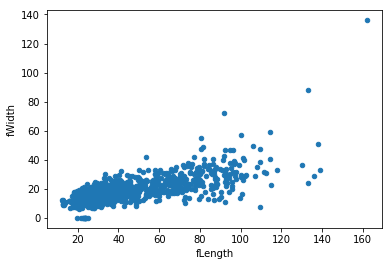

In [30]:
%matplotlib inline

data.plot.scatter("fLength","fWidth",)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbad7fab00>]],
      dtype=object)

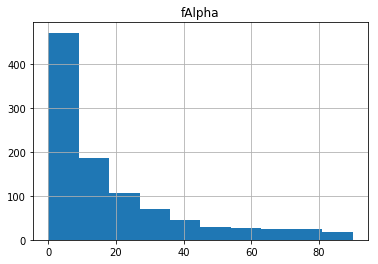

In [31]:
data.hist("fAlpha")

### ROOT

[ROOT](https://root.cern.ch/) needs a special mention. It is still nowadays, and by far, the most convenient tool to store and manage complex datasets pertaining physics experiments where "events" are recorded, in particular High Energy, Nuclear, Astro physics. It allows a nested structure, with complex data objects (classes) and references between them.

ROOT per se is obnoxious as it has been developed in the years as a way-too-many-purposes package, but its I/O is formidable.

Installing ROOT is (or at leaset used to be) a pain. 

(bare) ROOT files can be opened with non-ROOT library, [uproot](https://uproot.readthedocs.io/en/latest/index.html) (check its git [repo](https://github.com/scikit-hep/uproot))

A data structure, [RDataFrame](https://root.cern/doc/master/classROOT_1_1RDataFrame.html)
similar to the ones developed for modern Data Science applications has been put in production

In [38]:
import subprocess
subprocess.call(['conda', 'install', 'uproot'])

KeyboardInterrupt: 

In [ ]:
import uproot


events = uproot.open("https://scikit-hep.org/uproot3/examples/Zmumu.root")["events"]
events

In [ ]:
events.show()

In [ ]:
array = events["E1"].array(library="np")
array
plt.hist(array)

For more complicated examples, you can take a look at the CMS experiment [open data](http://opendata.cern.ch/docs/about-cms); sure you can find the Higgs boson in there, extracting the signal is way easier than obtaining, storing, and interpreting the data..